In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("cancer.csv")

In [3]:
df.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [4]:
df.tail()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
564,926125,M,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.31740,0.14740,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
565,926424,M,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.24390,0.13890,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
566,926682,M,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
567,926954,M,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820
568,927241,M,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,...,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [5]:
df.drop(columns='Id',axis=0,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosis                  569 non-null    object 
 1   Radius (mean)              569 non-null    float64
 2   Texture (mean)             569 non-null    float64
 3   Perimeter (mean)           569 non-null    float64
 4   Area (mean)                569 non-null    float64
 5   Smoothness (mean)          569 non-null    float64
 6   Compactness (mean)         569 non-null    float64
 7   Concavity (mean)           569 non-null    float64
 8   Concave points (mean)      569 non-null    float64
 9   Symmetry (mean)            569 non-null    float64
 10  Fractal dimension (mean)   569 non-null    float64
 11  Radius (se)                569 non-null    float64
 12  Texture (se)               569 non-null    float64
 13  Perimeter (se)             569 non-null    float64

In [7]:
df['Diagnosis'].unique()

array(['B', 'M'], dtype=object)

In [8]:
df.dtypes

Diagnosis                     object
Radius (mean)                float64
Texture (mean)               float64
Perimeter (mean)             float64
Area (mean)                  float64
Smoothness (mean)            float64
Compactness (mean)           float64
Concavity (mean)             float64
Concave points (mean)        float64
Symmetry (mean)              float64
Fractal dimension (mean)     float64
Radius (se)                  float64
Texture (se)                 float64
Perimeter (se)               float64
Area (se)                    float64
Smoothness (se)              float64
Compactness (se)             float64
Concavity (se)               float64
Concave points (se)          float64
Symmetry (se)                float64
Fractal dimension (se)       float64
Radius (worst)               float64
Texture (worst)              float64
Perimeter (worst)            float64
Area (worst)                 float64
Smoothness (worst)           float64
Compactness (worst)          float64
C

In [9]:
df.describe()

,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.isnull().sum()

Diagnosis                    0
Radius (mean)                0
Texture (mean)               0
Perimeter (mean)             0
Area (mean)                  0
Smoothness (mean)            0
Compactness (mean)           0
Concavity (mean)             0
Concave points (mean)        0
Symmetry (mean)              0
Fractal dimension (mean)     0
Radius (se)                  0
Texture (se)                 0
Perimeter (se)               0
Area (se)                    0
Smoothness (se)              0
Compactness (se)             0
Concavity (se)               0
Concave points (se)          0
Symmetry (se)                0
Fractal dimension (se)       0
Radius (worst)               0
Texture (worst)              0
Perimeter (worst)            0
Area (worst)                 0
Smoothness (worst)           0
Compactness (worst)          0
Concavity (worst)            0
Concave points (worst)       0
Symmetry (worst)             0
Fractal dimension (worst)    0
dtype: int64

In [11]:
df.shape

(569, 31)

In [13]:
df.sample()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
244,B,14.69,13.98,98.22,656.1,0.1031,0.1836,0.145,0.063,0.2086,...,16.46,18.34,114.1,809.2,0.1312,0.3635,0.3219,0.1108,0.2827,0.09208


In [56]:
df.isnull().sum()

Diagnosis                    0
Radius (mean)                0
Texture (mean)               0
Perimeter (mean)             0
Area (mean)                  0
Smoothness (mean)            0
Compactness (mean)           0
Concavity (mean)             0
Concave points (mean)        0
Symmetry (mean)              0
Fractal dimension (mean)     0
Radius (se)                  0
Texture (se)                 0
Perimeter (se)               0
Area (se)                    0
Smoothness (se)              0
Compactness (se)             0
Concavity (se)               0
Concave points (se)          0
Symmetry (se)                0
Fractal dimension (se)       0
Radius (worst)               0
Texture (worst)              0
Perimeter (worst)            0
Area (worst)                 0
Smoothness (worst)           0
Compactness (worst)          0
Concavity (worst)            0
Concave points (worst)       0
Symmetry (worst)             0
Fractal dimension (worst)    0
dtype: int64

<Axes: xlabel='Radius (mean)', ylabel='Texture (mean)'>

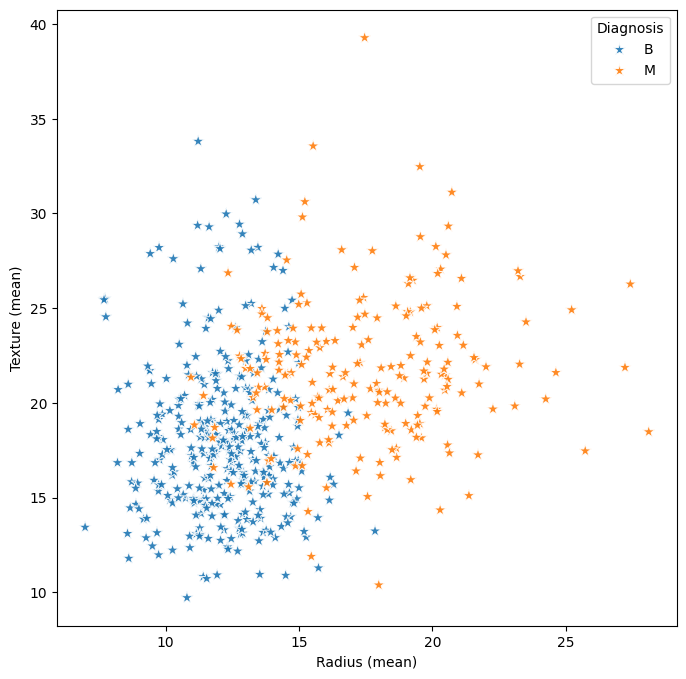

In [75]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df["Radius (mean)"], y=df["Texture (mean)"],hue='Diagnosis',data=df,marker='*',alpha=0.9,s=90)

In [34]:
x1=df.drop(columns='Diagnosis',axis=1)

In [35]:
y1=df['Diagnosis']

In [36]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
models=LogisticRegression()

In [39]:
y_pred=models.fit(x1_train,y1_train)

C:\Users\pt708\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
y_pred=models.predict(x1_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
accuracy_score(y_pred,y1_test)

0.9385964912280702

In [43]:
cm=confusion_matrix(y_pred,y1_test)

In [44]:
cm

array([[66,  2],
       [ 5, 41]], dtype=int64)

In [45]:



from sklearn.tree import DecisionTreeClassifier

In [46]:
mode=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [47]:
mode.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
y_prediction=mode.predict(x1_test)

In [49]:
accuracy_score(y_prediction,y1_test)

0.9210526315789473

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
model=KNeighborsClassifier(n_neighbors=5, weights='distance')

In [52]:
model.fit(x1_train,y1_train)

KNeighborsClassifier(weights='distance')

In [53]:
y_pre=model.predict(x1_test)

In [54]:
y_pre

array(['B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B'], dtype=object)

In [55]:
accuracy_score(y_pre,y1_test)

0.9385964912280702